## market-segmentation-ev-vehicle-india

Market segment evaluation is a critical process in understanding and targeting specific customer groups within a broader market. It involves analyzing various factors to divide the market into distinct segments based on shared characteristics, needs, and behaviors.

In [1]:
!pip install pandas numpy matplotlib seaborn --quiet

In [2]:
!pip install scikit-learn --quiet

In [3]:
!pip install bioinfokit --quiet

### Import Package & Data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [5]:
df = pd.read_csv('carwale-ev-vehicle.csv')

In [6]:
df.head()

,review,Exterior,Comfort,Performance,Fuel Economy,Value for Money,Condition,driven,rating,model_name
0,Superb car like as fantastic as petroleum car....,5.0,4.0,5.0,5.0,5.0,New,Few hundred kilometers,5.0,hyundai kona
1,"Anti national, worst service, worst customer c...",1.0,1.0,1.0,1.0,1.0,New,Haven't driven it,0.0,hyundai kona
2,Super happy with it. The car is too good,4.0,5.0,5.0,5.0,4.0,New,Few thousand kilometers,5.0,hyundai kona
3,"Pretty good car, smooth as a glider fast car, ...",5.0,5.0,5.0,5.0,5.0,New,Few thousand kilometers,5.0,hyundai kona
4,Price difference between petrol and electronic...,4.0,4.0,5.0,3.0,2.0,Not Purchased,Haven't driven it,3.0,hyundai kona


In [7]:
df.columns

Index(['review', 'Exterior', 'Comfort', 'Performance', 'Fuel Economy',
       'Value for Money', 'Condition', 'driven', 'rating', 'model_name'],
      dtype='object')

In [8]:
df.shape

(129, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review           129 non-null    object 
 1   Exterior         129 non-null    float64
 2   Comfort          129 non-null    float64
 3   Performance      129 non-null    float64
 4   Fuel Economy     129 non-null    float64
 5   Value for Money  129 non-null    float64
 6   Condition        129 non-null    object 
 7   driven           129 non-null    object 
 8   rating           129 non-null    float64
 9   model_name       129 non-null    object 
dtypes: float64(6), object(4)
memory usage: 10.2+ KB


In [10]:
df.isna().sum()

review             0
Exterior           0
Comfort            0
Performance        0
Fuel Economy       0
Value for Money    0
Condition          0
driven             0
rating             0
model_name         0
dtype: int64

In [11]:
df['Condition'].unique()

array(['New', 'Not Purchased', 'Used'], dtype=object)

In [12]:
df['Condition'].value_counts()

New              63
Not Purchased    46
Used             20
Name: Condition, dtype: int64

In [13]:
df['driven'].unique()

array(['Few hundred kilometers', "Haven't driven it",
       'Few thousand kilometers', 'Did a short drive once',
       'Its my mate since ages'], dtype=object)

In [14]:
df['driven'].value_counts()

Did a short drive once     37
Few thousand kilometers    34
Few hundred kilometers     31
Haven't driven it          25
Its my mate since ages      2
Name: driven, dtype: int64

In [15]:
df['driven'].replace("Its my mate since ages", "Haven't driven it", inplace = True)

In [16]:
df['driven'].value_counts()

Did a short drive once     37
Few thousand kilometers    34
Few hundred kilometers     31
Haven't driven it          27
Name: driven, dtype: int64

### Data Preprocessing

In [17]:
# use min max scaling, one hot encoding 
data = df.copy()

#### Scaling numeric features

In [18]:
numerical_columns = df.select_dtypes(include=['float64'])

In [19]:
numerical_columns.columns

Index(['Exterior', 'Comfort', 'Performance', 'Fuel Economy', 'Value for Money',
       'rating'],
      dtype='object')

In [20]:
# min max scaling

In [21]:
scaler = MinMaxScaler()

In [22]:
scaled_df = scaler.fit_transform(numerical_columns)

In [23]:
minmax_df = pd.DataFrame(scaled_df, columns=['Exterior', 'Comfort', 'Performance', 'Fuel Economy', 'Value for Money', 'rating'])

In [24]:
df = df.drop(columns=['Exterior', 'Comfort', 'Performance', 'Fuel Economy', 'Value for Money', 'rating'], axis=1)

In [25]:
df = pd.concat([df, minmax_df], axis=1)

In [26]:
df.head(2)

,review,Condition,driven,model_name,Exterior,Comfort,Performance,Fuel Economy,Value for Money,rating
0,Superb car like as fantastic as petroleum car....,New,Few hundred kilometers,hyundai kona,1.0,0.8,1.0,1.0,1.0,1.0
1,"Anti national, worst service, worst customer c...",New,Haven't driven it,hyundai kona,0.2,0.2,0.2,0.2,0.2,0.0


#### Encoding categorical data

In [27]:
a = ['Condition','driven']

In [28]:
categorical_columns = df[a].columns.tolist()                   # input_features is not equal to feature_names_in_

In [29]:
# one hot encoding

In [30]:
encoder = OneHotEncoder(sparse=False)

In [31]:
one_hot_df = encoder.fit_transform(df[categorical_columns])

In [32]:
list(encoder.get_feature_names_out(categorical_columns))

['Condition_New',
 'Condition_Not Purchased',
 'Condition_Used',
 'driven_Did a short drive once',
 'driven_Few hundred kilometers',
 'driven_Few thousand kilometers',
 "driven_Haven't driven it"]

In [33]:
ohe_df = pd.DataFrame(one_hot_df, columns= ['New', 'Not Purchased', 'Used', 'Did a short drive once', 'Few hundred kilometers', 'Few thousand kilometers', "Haven't driven it"])

In [34]:
df = pd.concat([df, ohe_df], axis=1)

In [35]:
df = df.drop(categorical_columns, axis=1)

In [36]:
df.head(2)

,review,model_name,Exterior,Comfort,Performance,Fuel Economy,Value for Money,rating,New,Not Purchased,Used,Did a short drive once,Few hundred kilometers,Few thousand kilometers,Haven't driven it
0,Superb car like as fantastic as petroleum car....,hyundai kona,1.0,0.8,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,"Anti national, worst service, worst customer c...",hyundai kona,0.2,0.2,0.2,0.2,0.2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


### Explore Data

In [38]:
data.head(5)

,review,Exterior,Comfort,Performance,Fuel Economy,Value for Money,Condition,driven,rating,model_name
0,Superb car like as fantastic as petroleum car....,5.0,4.0,5.0,5.0,5.0,New,Few hundred kilometers,5.0,hyundai kona
1,"Anti national, worst service, worst customer c...",1.0,1.0,1.0,1.0,1.0,New,Haven't driven it,0.0,hyundai kona
2,Super happy with it. The car is too good,4.0,5.0,5.0,5.0,4.0,New,Few thousand kilometers,5.0,hyundai kona
3,"Pretty good car, smooth as a glider fast car, ...",5.0,5.0,5.0,5.0,5.0,New,Few thousand kilometers,5.0,hyundai kona
4,Price difference between petrol and electronic...,4.0,4.0,5.0,3.0,2.0,Not Purchased,Haven't driven it,3.0,hyundai kona


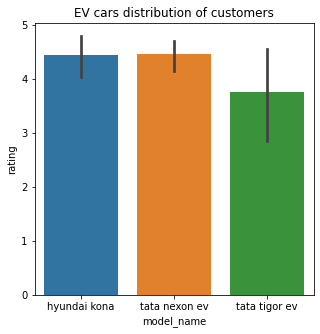

In [49]:
plt.rcParams['figure.figsize'] = (5, 5)
f = sns.barplot(x = data['model_name'], y = data['rating'])
plt.title('EV cars distribution of customers')
plt.show()

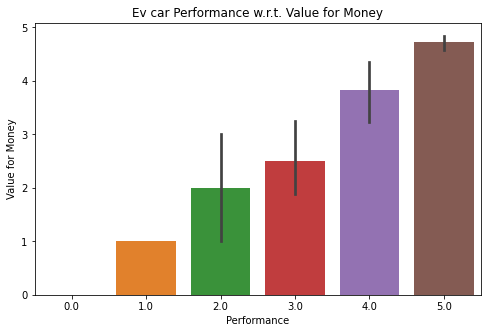

In [57]:
plt.rcParams['figure.figsize'] = (8, 5)
f = sns.barplot(x = data['Performance'], y = data['Value for Money'])
plt.title('Ev car Performance w.r.t. Value for Money')
plt.show()

#### Correlation

The greater the absolute value of the correlation coefficient, the stronger the relationship and the sign of the correlation coefficient represents the direction of the relationship.

In [58]:
corr = df.corr().round(2)

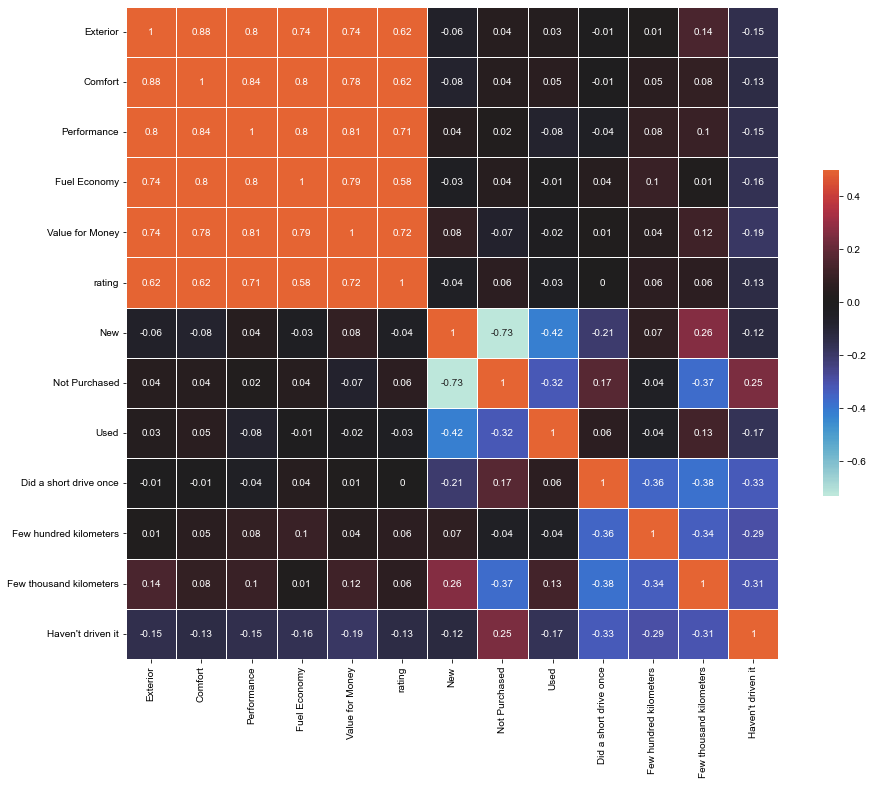

In [59]:
plt.subplots(figsize=(16, 12))
sns.heatmap(corr, vmax=.5, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={'shrink': .5})
sns.set(font_scale= 1)
plt.show()

### PCA

In [60]:
df.head(2)

,review,model_name,Exterior,Comfort,Performance,Fuel Economy,Value for Money,rating,New,Not Purchased,Used,Did a short drive once,Few hundred kilometers,Few thousand kilometers,Haven't driven it
0,Superb car like as fantastic as petroleum car....,hyundai kona,1.0,0.8,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,"Anti national, worst service, worst customer c...",hyundai kona,0.2,0.2,0.2,0.2,0.2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [61]:
df1 = df.iloc[:, 2:8]

In [62]:
df1.head(2)

,Exterior,Comfort,Performance,Fuel Economy,Value for Money,rating
0,1.0,0.8,1.0,1.0,1.0,1.0
1,0.2,0.2,0.2,0.2,0.2,0.0


In [63]:
from sklearn.decomposition import PCA

In [64]:
pca_df = PCA(n_components= 6)

In [65]:
pca_features = pca_df.fit_transform(df1)

In [66]:
pca_features

array([[-2.37881996e-01,  5.14528815e-02, -8.73898582e-02,
         2.40304051e-02, -1.04589487e-02,  1.51690462e-01],
       [ 1.72241068e+00, -3.39679397e-02, -2.29416966e-01,
        -8.53469069e-02, -1.03182702e-01, -1.92572132e-02],
       [-1.47709563e-01,  4.34323710e-02,  2.77969332e-02,
         1.51071242e-01, -5.80727889e-02, -1.31382241e-01],
       [-3.10717255e-01, -6.40481037e-03, -1.12933293e-02,
        -1.59295057e-02,  1.05062547e-02, -1.67347316e-03],
       [ 4.52748747e-01, -7.85736329e-02,  2.77756126e-01,
         4.20743519e-02, -2.80702308e-01,  1.22858844e-02],
       [-6.77935576e-02,  1.14590578e-01, -2.43960962e-02,
         1.69461434e-01, -3.10875722e-02,  2.98454273e-01],
       [-3.10717255e-01, -6.40481037e-03, -1.12933293e-02,
        -1.59295057e-02,  1.05062547e-02, -1.67347316e-03],
       [-3.10717255e-01, -6.40481037e-03, -1.12933293e-02,
        -1.59295057e-02,  1.05062547e-02, -1.67347316e-03],
       [-3.10717255e-01, -6.40481037e-03, -1.129

In [67]:
pca_df.explained_variance_

array([0.26181613, 0.03247519, 0.01550306, 0.01055633, 0.00840555,
       0.00465461])

The amount of variance explained by each of the selected components. Equal to n_components largest eigenvalues of the covariance matrix of X.

In [68]:
pca_df.explained_variance_ratio_

array([0.78526577, 0.09740291, 0.04649836, 0.03166162, 0.02521077,
       0.01396057])

Percentage of variance explained by each of the selected components.
If n_components is not set then all components are stored and the sum of the ratios is equal to 1.0.

In [69]:
summary_df = pd.DataFrame({
    'Standard deviation': np.sqrt(pca_df.explained_variance_),
    'Proportion of Variance': pca_df.explained_variance_ratio_,
    'Cumulative Proportion': pca_df.explained_variance_ratio_.cumsum()
}).T

for i in summary_df.columns:
    summary_df.rename(columns ={i:f"PC{i+1}"}, inplace=True)

In [70]:
summary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6
Standard deviation,0.5117,0.1802,0.1245,0.1027,0.0917,0.0682
Proportion of Variance,0.7853,0.0974,0.0465,0.0317,0.0252,0.0140
Cumulative Proportion,0.7853,0.8827,0.9292,0.9608,0.9860,1.0000


In [71]:
#pca_df.components_

The estimated number of components. When n_components is set to ‘mle’ or a number between 0 and 1 (with svd_solver == ‘full’) this number is estimated from input data. Otherwise it equals the parameter n_components, or the lesser value of n_features and n_samples if n_components is None.

In [72]:
pca_matrix = pd.DataFrame(pca_df.components_, columns = df1.columns).T
for i in pca_matrix.columns:
    pca_matrix.rename(columns ={i:f"PC{i+1}"}, inplace=True)

In [73]:
pca_matrix=pca_matrix*-1

In [74]:
pca_matrix.round(3)

,PC1,PC2,PC3,PC4,PC5,PC6
Exterior,0.329,0.223,-0.500,0.308,-0.345,-0.616
Comfort,0.364,0.289,-0.380,0.200,-0.105,0.767
Performance,0.417,0.115,-0.171,-0.178,0.852,-0.163
Fuel Economy,0.383,0.370,0.266,-0.725,-0.344,-0.047
Value for Money,0.486,0.026,0.695,0.527,0.002,-0.033
rating,0.450,-0.846,-0.147,-0.175,-0.162,0.056


In [75]:
sns.set_style("whitegrid")

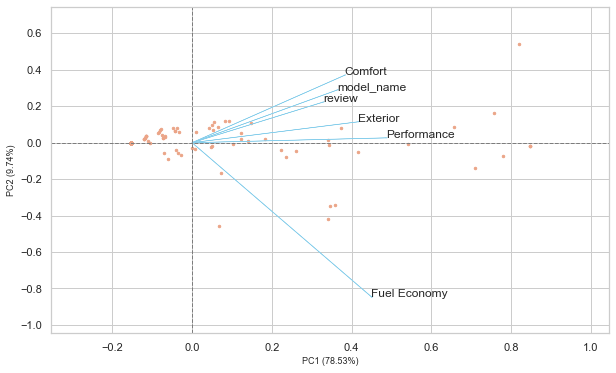

In [76]:
from bioinfokit.visuz import cluster

ax = cluster.biplot(cscore=pca_features, loadings=-1*pca_df.components_, labels=df.columns.values, 
               var1=round(pca_df.explained_variance_ratio_[0]*100,2), var2=round(pca_df.explained_variance_ratio_[1]*100,2),
                    show=True,dim=(10,6))

### KMeans Clustering

In [77]:
from sklearn.cluster import KMeans

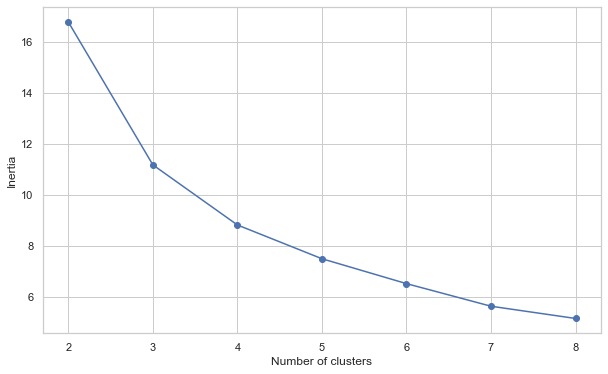

In [78]:
k_range = range(2, 9)
inertia = []

# Specify the value for n_init
n_init_value = 6

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state= 42, n_init=n_init_value)
    kmeans.fit(df1)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(10,6))    
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

This plot shows the inertia values for different numbers of segments (clusters), helping to determine the optimal number of segments based on the "elbow" method. If you've stored the results from multiple runs of K-means clustering, you can plot them similarly to evaluate different parameter settings or preprocessing choices.

### Extracting Segments

In [79]:
k_best = 3  # Assuming we choose the best number of segments based on the plot
kmeans_best = KMeans(n_clusters= k_best, random_state= 42, n_init= n_init_value)
kmeans_best.fit_predict(df1)

array([0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 0, 1])

In [80]:
df['cluster'] = kmeans_best.labels_

In [81]:
#To see each cluster size
from collections import Counter
Counter(kmeans_best.labels_)

Counter({0: 94, 2: 9, 1: 26})

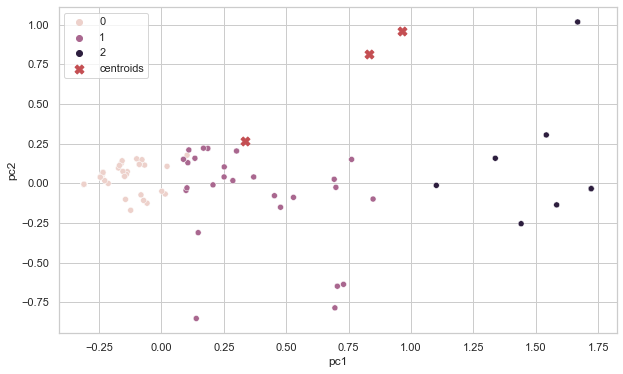

In [82]:
#Visualizing clusters
names = ['pc1','pc2','pc3','pc4','pc5','pc6']
pf = pd.DataFrame(data = pca_features, columns = names)

plt.figure(figsize=(10,6))
sns.scatterplot(data= pf, x="pc1", y="pc2", hue=kmeans_best.labels_)
plt.scatter(kmeans_best.cluster_centers_[:,0], kmeans_best.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")

plt.legend()
plt.show()

### Describe Segments

In [83]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

crosstab =pd.crosstab(df['cluster'],df['model_name'])

crosstab 

model_name,hyundai kona,tata nexon ev,tata tigor ev
cluster,,,
0,25,57,12
1,7,15,4
2,2,3,4


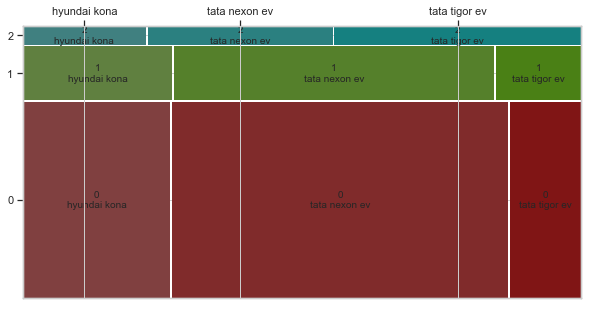

In [84]:
# Mosaic Plot
plt.rcParams['figure.figsize'] = (10,5)
mosaic(crosstab.stack(), horizontal=False)
plt.show()

In [89]:
# Mosaic plot Condition vs segment
crosstab_gender =pd.crosstab(df['cluster'], data['Condition'])
crosstab_gender

Condition,New,Not Purchased,Used
cluster,,,
0,50,31,13
1,7,13,6
2,6,2,1


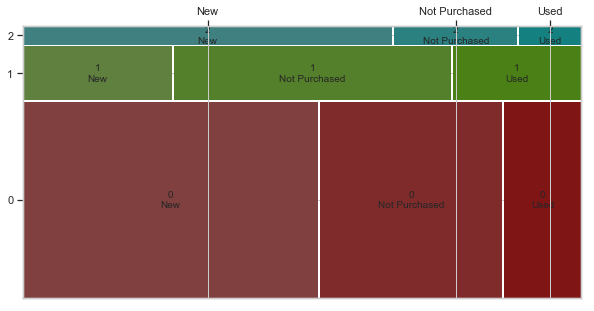

In [90]:
plt.rcParams['figure.figsize'] = (10,5)
mosaic(crosstab_gender.stack(), horizontal=False)
plt.show()

<AxesSubplot:xlabel='cluster', ylabel='Comfort'>

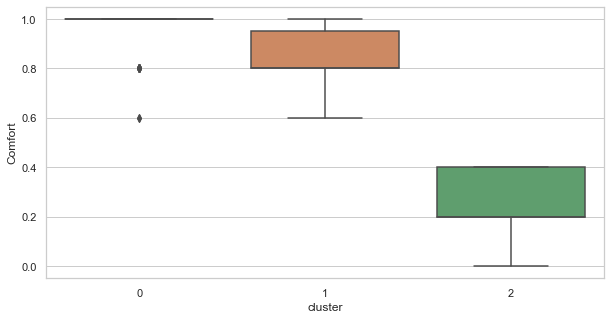

In [96]:
# Box plot for age

sns.boxplot(x="cluster", y="Comfort", data= df)

### Selecting target segment

In [99]:
# Value for Money
value = df.groupby('cluster')['Value for Money'].mean()
value = value.to_frame().reset_index()
value

,cluster,Value for Money
0,0,0.974468
1,1,0.546154
2,2,0.177778


In [100]:
# Performance
performance = df.groupby('cluster')['Performance'].mean()
performance = performance.to_frame().reset_index()
performance

,cluster,Performance
0,0,0.980851
1,1,0.769231
2,2,0.200000


In [101]:
# Exterior
exterior = df.groupby('cluster')['Exterior'].mean()
exterior = exterior.to_frame().reset_index()
exterior

,cluster,Exterior
0,0,0.965957
1,1,0.830769
2,2,0.333333


In [103]:
# Comfort
comfort = df.groupby('cluster')['Comfort'].mean()
comfort = comfort.to_frame().reset_index()
comfort

,cluster,Comfort
0,0,0.961702
1,1,0.815385
2,2,0.266667


In [104]:
# Fuel Economy
economy = df.groupby('cluster')['Comfort'].mean()
fuel_economy = economy.to_frame().reset_index()
fuel_economy

,cluster,Comfort
0,0,0.961702
1,1,0.815385
2,2,0.266667


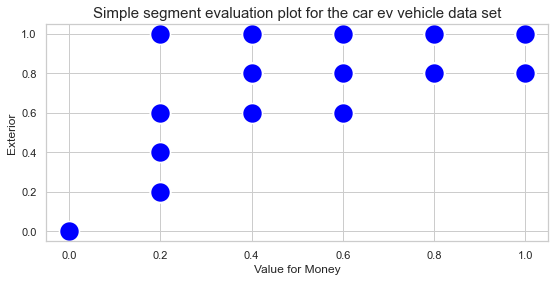

In [116]:
#Target segments

plt.figure(figsize = (9,4))
sns.scatterplot(x = "Value for Money", y = "Exterior", data= df, s=400, color="blue")
plt.title("Simple segment evaluation plot for the car ev vehicle data set",
          fontsize = 15) 
plt.xlabel("Value for Money", fontsize = 12) 
plt.ylabel("Exterior", fontsize = 12) 
plt.show()

Above are the selected segments.